1. Setup

In [1]:
import numpy as np
import physo

z = np.random.uniform(-10, 10, 50)
v = np.random.uniform(-10, 10, 50)
X = np.stack((z, v), axis=0)
y = 1.234*9.807*z + 1.234*v**2
# set 1

2. Session runs

SR task started...


100%|██████████| 1000/1000 [00:00<00:00, 83002.93it/s]


=========== Epoch 00000 ===========
-> Time 16.50 s

Overall best  at R=0.536374
-> Raw expression : 
       2
c₀₀⋅x₀₁ 

Best of epoch at R=0.536374
-> Raw expression : 
       2
c₀₀⋅x₀₁ 




100%|██████████| 1000/1000 [00:00<00:00, 106562.60it/s]


=========== Epoch 00001 ===========
-> Time 8.50 s

Overall best  at R=0.536374
-> Raw expression : 
       2
c₀₀⋅x₀₁ 

Best of epoch at R=0.536374
-> Raw expression : 
       2
c₀₀⋅x₀₁ 




100%|██████████| 1000/1000 [00:00<00:00, 98735.97it/s]


=========== Epoch 00002 ===========
-> Time 4.60 s

Overall best  at R=0.536374
-> Raw expression : 
       2
c₀₀⋅x₀₁ 

Best of epoch at R=0.536374
-> Raw expression : 
       2
c₀₀⋅x₀₁ 




100%|██████████| 1000/1000 [00:00<00:00, 101801.02it/s]


=========== Epoch 00003 ===========
-> Time 4.38 s

Overall best  at R=0.536374
-> Raw expression : 
       2
c₀₀⋅x₀₁ 

Best of epoch at R=0.536374
-> Raw expression : 
                ⎛     0.5⎞
                ⎜⎛c₀₁⎞   ⎟
             log⎜⎜───⎟   ⎟
                ⎝⎝c₀₁⎠   ⎠
             ─────────────
                    x₀₁   
                1.0⋅───   
                    x₀₁   
c₀₀⋅x₀₁⋅x₀₁⋅ℯ             




100%|██████████| 1000/1000 [00:00<00:00, 86912.37it/s]


=========== Epoch 00004 ===========
-> Time 4.77 s

Overall best  at R=0.536374
-> Raw expression : 
       2
c₀₀⋅x₀₁ 

Best of epoch at R=0.536374
-> Raw expression : 
                                        2
⎛                                   0.5⎞ 
⎜ ⎛        ⎛     2      2    1.0  ⎞⎞   ⎟ 
⎜-⎜c₀₀⋅1.0⋅⎜- x₀₁  + x₀₁  + ──────⎟⎟   ⎟ 
⎜ ⎜        ⎜                     2⎟⎟   ⎟ 
⎜ ⎜        ⎜                ⎛-1 ⎞ ⎟⎟   ⎟ 
⎜ ⎜        ⎜                ⎜───⎟ ⎟⎟   ⎟ 
⎝ ⎝        ⎝                ⎝x₀₁⎠ ⎠⎠   ⎠ 




100%|██████████| 1000/1000 [00:00<00:00, 87226.87it/s]


=========== Epoch 00005 ===========
-> Time 7.53 s

Overall best  at R=0.600990
-> Raw expression : 
                     2 
-c₀₁⋅x₀₀⋅(-1.0 - 1.0)  
───────────────────────
    ⎛   ⎛   ⎛ 1 ⎞⎞⎞    
    ⎜log⎜sin⎜───⎟⎟⎟    
    ⎜   ⎝   ⎝1.0⎠⎠⎟    
    ⎜─────────────⎟    
    ⎝     c₀₀     ⎠    

Best of epoch at R=0.600990
-> Raw expression : 
                     2 
-c₀₁⋅x₀₀⋅(-1.0 - 1.0)  
───────────────────────
    ⎛   ⎛   ⎛ 1 ⎞⎞⎞    
    ⎜log⎜sin⎜───⎟⎟⎟    
    ⎜   ⎝   ⎝1.0⎠⎠⎟    
    ⎜─────────────⎟    
    ⎝     c₀₀     ⎠    




100%|██████████| 1000/1000 [00:00<00:00, 77665.11it/s]


=========== Epoch 00006 ===========
-> Time 5.38 s

Overall best  at R=0.600990
-> Raw expression : 
                     2 
-c₀₁⋅x₀₀⋅(-1.0 - 1.0)  
───────────────────────
    ⎛   ⎛   ⎛ 1 ⎞⎞⎞    
    ⎜log⎜sin⎜───⎟⎟⎟    
    ⎜   ⎝   ⎝1.0⎠⎠⎟    
    ⎜─────────────⎟    
    ⎝     c₀₀     ⎠    

Best of epoch at R=0.600990
-> Raw expression : 
           -1.0             
────────────────────────────
⎛   ⎛                    2⎞⎞
⎜   ⎜    ⎛             2⎞ ⎟⎟
⎜   ⎜   2⎜⎛         1 ⎞ ⎟ ⎟⎟
⎜log⎜cos ⎜⎜x₀₁⋅1.0⋅───⎟ ⎟ ⎟⎟
⎜   ⎝    ⎝⎝        x₀₁⎠ ⎠ ⎠⎟
⎜──────────────────────────⎟
⎜     ⎛      1      ⎞      ⎟
⎜     ⎜─────────────⎟      ⎟
⎜     ⎜⎛    1.0    ⎞⎟      ⎟
⎜     ⎜⎜───────────⎟⎟      ⎟
⎝     ⎝⎝c₀₀⋅c₀₁⋅x₀₀⎠⎠      ⎠




100%|██████████| 1000/1000 [00:00<00:00, 76877.89it/s]


=========== Epoch 00007 ===========
-> Time 4.80 s

Overall best  at R=0.600990
-> Raw expression : 
                     2 
-c₀₁⋅x₀₀⋅(-1.0 - 1.0)  
───────────────────────
    ⎛   ⎛   ⎛ 1 ⎞⎞⎞    
    ⎜log⎜sin⎜───⎟⎟⎟    
    ⎜   ⎝   ⎝1.0⎠⎠⎟    
    ⎜─────────────⎟    
    ⎝     c₀₀     ⎠    

Best of epoch at R=0.536374
-> Raw expression : 
      -c₀₀       
─────────────────
⎛       1       ⎞
⎜───────────────⎟
⎜       2      2⎟
⎝- 2⋅x₀₁  - x₀₁ ⎠




100%|██████████| 1000/1000 [00:00<00:00, 71306.23it/s]


=========== Epoch 00008 ===========
-> Time 6.89 s

Overall best  at R=0.600990
-> Raw expression : 
                     2 
-c₀₁⋅x₀₀⋅(-1.0 - 1.0)  
───────────────────────
    ⎛   ⎛   ⎛ 1 ⎞⎞⎞    
    ⎜log⎜sin⎜───⎟⎟⎟    
    ⎜   ⎝   ⎝1.0⎠⎠⎟    
    ⎜─────────────⎟    
    ⎝     c₀₀     ⎠    

Best of epoch at R=0.600990
-> Raw expression : 
          -x₀₀       
c₀₀⋅─────────────────
               ⎛   2⎞
       1    sin⎝1.0 ⎠
    - ─── + ─────────
      c₀₁      c₀₁   




100%|██████████| 1000/1000 [00:00<00:00, 63941.46it/s]


=========== Epoch 00009 ===========
-> Time 5.87 s

Overall best  at R=0.600990
-> Raw expression : 
                     2 
-c₀₁⋅x₀₀⋅(-1.0 - 1.0)  
───────────────────────
    ⎛   ⎛   ⎛ 1 ⎞⎞⎞    
    ⎜log⎜sin⎜───⎟⎟⎟    
    ⎜   ⎝   ⎝1.0⎠⎠⎟    
    ⎜─────────────⎟    
    ⎝     c₀₀     ⎠    

Best of epoch at R=0.536374
-> Raw expression : 
c₀₀⋅1.0⋅-x₀₁⋅x₀₁




100%|██████████| 1000/1000 [00:00<00:00, 51260.07it/s]


=========== Epoch 00010 ===========
-> Time 5.56 s

Overall best  at R=0.600990
-> Raw expression : 
                     2 
-c₀₁⋅x₀₀⋅(-1.0 - 1.0)  
───────────────────────
    ⎛   ⎛   ⎛ 1 ⎞⎞⎞    
    ⎜log⎜sin⎜───⎟⎟⎟    
    ⎜   ⎝   ⎝1.0⎠⎠⎟    
    ⎜─────────────⎟    
    ⎝     c₀₀     ⎠    

Best of epoch at R=0.536374
-> Raw expression : 
-c₀₀  
──────
     2
⎛ 1 ⎞ 
⎜───⎟ 
⎝x₀₁⎠ 




100%|██████████| 1000/1000 [00:00<00:00, 41768.03it/s]


=========== Epoch 00011 ===========
-> Time 6.55 s

Overall best  at R=0.600990
-> Raw expression : 
                     2 
-c₀₁⋅x₀₀⋅(-1.0 - 1.0)  
───────────────────────
    ⎛   ⎛   ⎛ 1 ⎞⎞⎞    
    ⎜log⎜sin⎜───⎟⎟⎟    
    ⎜   ⎝   ⎝1.0⎠⎠⎟    
    ⎜─────────────⎟    
    ⎝     c₀₀     ⎠    

Best of epoch at R=0.600990
-> Raw expression : 
    ⎛              2⎞                          
    ⎜    ⎛log(1.0)⎞ ⎟                          
 sin⎜1.0⋅⎜────────⎟ ⎟⋅1.0 + 1.0                
    ⎝    ⎝  1.0   ⎠ ⎠                          
ℯ                              ⋅1.0⋅c₀₀⋅x₀₀⋅c₀₁




100%|██████████| 1000/1000 [00:00<00:00, 42832.67it/s]


=========== Epoch 00012 ===========
-> Time 7.22 s

Overall best  at R=1.000000
-> Raw expression : 
       2    c₀₀⋅x₀₁ 
c₀₀⋅x₀₁  + ─────────
           ⎛ -x₀₁  ⎞
           ⎜───────⎟
           ⎝c₀₁⋅x₀₀⎠

Best of epoch at R=1.000000
-> Raw expression : 
       2    c₀₀⋅x₀₁ 
c₀₀⋅x₀₁  + ─────────
           ⎛ -x₀₁  ⎞
           ⎜───────⎟
           ⎝c₀₁⋅x₀₀⎠




100%|██████████| 1000/1000 [00:00<00:00, 38239.19it/s]


=========== Epoch 00013 ===========
-> Time 6.87 s

Overall best  at R=1.000000
-> Raw expression : 
       2    c₀₀⋅x₀₁ 
c₀₀⋅x₀₁  + ─────────
           ⎛ -x₀₁  ⎞
           ⎜───────⎟
           ⎝c₀₁⋅x₀₀⎠

Best of epoch at R=0.600990
-> Raw expression : 
                  -c₀₀          1.0
c₀₀⋅x₀₀⋅x₀₁⋅──────────────────⋅ℯ   
                -           1      
            c₀₀⋅1⋅x₀₁⋅1.0⋅───      
                          c₀₁      




100%|██████████| 1000/1000 [00:00<00:00, 34762.50it/s]


=========== Epoch 00014 ===========
-> Time 7.56 s

Overall best  at R=1.000000
-> Raw expression : 
       2    c₀₀⋅x₀₁ 
c₀₀⋅x₀₁  + ─────────
           ⎛ -x₀₁  ⎞
           ⎜───────⎟
           ⎝c₀₁⋅x₀₀⎠

Best of epoch at R=0.600990
-> Raw expression : 
             -1               
──────────────────────────────
                  1           
x₀₁⋅1.0⋅──────────────────────
        c₀₁⋅-1⋅x₀₁⋅1.0⋅c₀₀⋅x₀₀




100%|██████████| 1000/1000 [00:00<00:00, 29869.92it/s]


=========== Epoch 00015 ===========
-> Time 7.36 s

Overall best  at R=1.000000
-> Raw expression : 
       2    c₀₀⋅x₀₁ 
c₀₀⋅x₀₁  + ─────────
           ⎛ -x₀₁  ⎞
           ⎜───────⎟
           ⎝c₀₁⋅x₀₀⎠

Best of epoch at R=0.600990
-> Raw expression : 
x₀₀⋅-1.0⋅sin(1.0)⋅1.0⋅-c₀₀⋅c₀₁




100%|██████████| 1000/1000 [00:00<00:00, 27181.38it/s]


=========== Epoch 00016 ===========
-> Time 7.92 s

Overall best  at R=1.000000
-> Raw expression : 
                   1                  
                 ─────                
                 ⎛x₀₁⎞                
                 ⎜───⎟                
                 ⎝x₀₁⎠                
--c₀₀⋅c₀₁⋅x₀₀ + ℯ     ⋅x₀₁⋅c₀₀⋅x₀₁⋅1.0

Best of epoch at R=1.000000
-> Raw expression : 
                   1                  
                 ─────                
                 ⎛x₀₁⎞                
                 ⎜───⎟                
                 ⎝x₀₁⎠                
--c₀₀⋅c₀₁⋅x₀₀ + ℯ     ⋅x₀₁⋅c₀₀⋅x₀₁⋅1.0




100%|██████████| 1000/1000 [00:00<00:00, 29835.28it/s]


=========== Epoch 00017 ===========
-> Time 6.07 s

Overall best  at R=1.000000
-> Raw expression : 
                   1                  
                 ─────                
                 ⎛x₀₁⎞                
                 ⎜───⎟                
                 ⎝x₀₁⎠                
--c₀₀⋅c₀₁⋅x₀₀ + ℯ     ⋅x₀₁⋅c₀₀⋅x₀₁⋅1.0

Best of epoch at R=1.000000
-> Raw expression : 
                 ⎛   ⎛   2⎞⎞               
                 ⎜log⎝1.0 ⎠⎟               
              sin⎜─────────⎟               
                 ⎝   1.0   ⎠               
c₀₀⋅c₀₁⋅-x₀₀⋅ℯ               - x₀₁⋅-c₀₀⋅x₀₁


SR task started...


100%|██████████| 10000/10000 [00:00<00:00, 32804.44it/s]
/rds/project/jmmh2/rds-jmmh2-projects/olink_proteomics/scallop/PhySO/physo/learn/monitoring.py:640: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(self.save_path)


=========== Epoch 00000 ===========
-> Time 40.12 s

Overall best  at R=1.000000
-> Raw expression : 
                      ⎛            2⎞
                      ⎜⎛       1.0⎞ ⎟
                      ⎜⎜       ───⎟ ⎟
    ⎛ c₀₁       2⎞    ⎜⎜       1.0⎟ ⎟
c₀₀⋅⎜───── - x₀₁ ⎟⋅cos⎝⎝1.0 + ℯ   ⎠ ⎠
    ⎜⎛ 1 ⎞       ⎟                   
    ⎜⎜───⎟       ⎟                   
    ⎝⎝x₀₀⎠       ⎠                   

Best of epoch at R=1.000000
-> Raw expression : 
                      ⎛            2⎞
                      ⎜⎛       1.0⎞ ⎟
                      ⎜⎜       ───⎟ ⎟
    ⎛ c₀₁       2⎞    ⎜⎜       1.0⎟ ⎟
c₀₀⋅⎜───── - x₀₁ ⎟⋅cos⎝⎝1.0 + ℯ   ⎠ ⎠
    ⎜⎛ 1 ⎞       ⎟                   
    ⎜⎜───⎟       ⎟                   
    ⎝⎝x₀₀⎠       ⎠                   




100%|██████████| 10000/10000 [00:00<00:00, 114559.34it/s]
/rds/project/jmmh2/rds-jmmh2-projects/olink_proteomics/scallop/PhySO/physo/learn/monitoring.py:640: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(self.save_path)


=========== Epoch 00001 ===========
-> Time 42.03 s

Overall best  at R=1.000000
-> Raw expression : 
                      ⎛            2⎞
                      ⎜⎛       1.0⎞ ⎟
                      ⎜⎜       ───⎟ ⎟
    ⎛ c₀₁       2⎞    ⎜⎜       1.0⎟ ⎟
c₀₀⋅⎜───── - x₀₁ ⎟⋅cos⎝⎝1.0 + ℯ   ⎠ ⎠
    ⎜⎛ 1 ⎞       ⎟                   
    ⎜⎜───⎟       ⎟                   
    ⎝⎝x₀₀⎠       ⎠                   

Best of epoch at R=0.600990
-> Raw expression : 
         x₀₁         
─────────────────────
⎛         1         ⎞
⎜───────────────────⎟
⎜⎛       c₀₀       ⎞⎟
⎜⎜─────────────────⎟⎟
⎜⎜⎛          ⎛ 1 ⎞⎞⎟⎟
⎜⎜⎜1.0 - -sin⎜───⎟⎟⎟⎟
⎜⎜⎜          ⎝1.0⎠⎟⎟⎟
⎜⎜⎜───────────────⎟⎟⎟
⎜⎜⎜   ⎛c₀₁⋅x₀₀⎞   ⎟⎟⎟
⎜⎜⎜   ⎜───────⎟   ⎟⎟⎟
⎝⎝⎝   ⎝1.0⋅x₀₁⎠   ⎠⎠⎠




100%|██████████| 10000/10000 [00:00<00:00, 105782.67it/s]
/rds/project/jmmh2/rds-jmmh2-projects/olink_proteomics/scallop/PhySO/physo/learn/monitoring.py:640: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(self.save_path)


=========== Epoch 00002 ===========
-> Time 58.72 s

Overall best  at R=1.000000
-> Raw expression : 
                      ⎛            2⎞
                      ⎜⎛       1.0⎞ ⎟
                      ⎜⎜       ───⎟ ⎟
    ⎛ c₀₁       2⎞    ⎜⎜       1.0⎟ ⎟
c₀₀⋅⎜───── - x₀₁ ⎟⋅cos⎝⎝1.0 + ℯ   ⎠ ⎠
    ⎜⎛ 1 ⎞       ⎟                   
    ⎜⎜───⎟       ⎟                   
    ⎝⎝x₀₀⎠       ⎠                   

Best of epoch at R=0.600990
-> Raw expression : 
                ⎛                                  2⎞
                ⎜⎛    0.5⎛           1           ⎞⎞ ⎟
c₀₀⋅c₀₁⋅x₀₀⋅-log⎜⎜-cos   ⎜───────────────────────⎟⎟ ⎟
                ⎜⎜       ⎜        1              ⎟⎟ ⎟
                ⎜⎜       ⎜───────────────── + 1.0⎟⎟ ⎟
                ⎜⎜       ⎜              1.0      ⎟⎟ ⎟
                ⎝⎝       ⎝-1.0 + 1.0 + ℯ         ⎠⎠ ⎠




100%|██████████| 10000/10000 [00:00<00:00, 96620.24it/s]
/rds/project/jmmh2/rds-jmmh2-projects/olink_proteomics/scallop/PhySO/physo/learn/monitoring.py:640: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(self.save_path)


=========== Epoch 00003 ===========
-> Time 41.53 s

Overall best  at R=1.000000
-> Raw expression : 
        ⎛             2⎞
c₀₀⋅x₀₀⋅⎝c₀₁⋅x₀₀ + x₀₁ ⎠
────────────────────────
        -1.0⋅x₀₀        

Best of epoch at R=1.000000
-> Raw expression : 
        ⎛             2⎞
c₀₀⋅x₀₀⋅⎝c₀₁⋅x₀₀ + x₀₁ ⎠
────────────────────────
        -1.0⋅x₀₀        




100%|██████████| 10000/10000 [00:00<00:00, 84678.50it/s]
/rds/project/jmmh2/rds-jmmh2-projects/olink_proteomics/scallop/PhySO/physo/learn/monitoring.py:640: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(self.save_path)


=========== Epoch 00004 ===========
-> Time 40.40 s

Overall best  at R=1.000000
-> Raw expression : 
        ⎛             2⎞
c₀₀⋅x₀₀⋅⎝c₀₁⋅x₀₀ + x₀₁ ⎠
────────────────────────
        -1.0⋅x₀₀        

Best of epoch at R=0.600990
-> Raw expression : 
   ⎛    ⎛      c₀₀⎞     1 ⎞                
   ⎜ sin⎜1.0 + ───⎟    ───⎟                
   ⎜    ⎝      c₀₀⎠    1.0⎟                
log⎝ℯ               + ℯ   ⎠⋅1.0⋅x₀₀⋅c₀₁⋅c₀₀




100%|██████████| 10000/10000 [00:00<00:00, 69667.73it/s]
/rds/project/jmmh2/rds-jmmh2-projects/olink_proteomics/scallop/PhySO/physo/learn/monitoring.py:640: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(self.save_path)


=========== Epoch 00005 ===========
-> Time 42.52 s

Overall best  at R=1.000000
-> Raw expression : 
        ⎛             2⎞
c₀₀⋅x₀₀⋅⎝c₀₁⋅x₀₀ + x₀₁ ⎠
────────────────────────
        -1.0⋅x₀₀        

Best of epoch at R=1.000000
-> Raw expression : 
     ⎛                  2⎞
-c₀₀⋅⎝-x₀₀⋅1.0⋅c₀₁ - x₀₁ ⎠




/rds/project/jmmh2/rds-jmmh2-projects/olink_proteomics/scallop/PhySO/physo/learn/monitoring.py:640: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(self.save_path)


SR task started...


100%|██████████| 1000/1000 [00:00<00:00, 109534.73it/s]


=========== Epoch 00000 ===========
-> Time 25.24 s

Overall best  at R=0.600990
-> Raw expression : 
            g             
──────────────────────────
⎛   ⎛            2      ⎞⎞
⎜   ⎜⎛   ⎛m⎞    ⎞       ⎟⎟
⎜sin⎜⎜log⎜─⎟⋅1.0⎟  - 1.0⎟⎟
⎜   ⎝⎝   ⎝m⎠    ⎠       ⎠⎟
⎜────────────────────────⎟
⎝          m⋅z           ⎠

Best of epoch at R=0.600990
-> Raw expression : 
            g             
──────────────────────────
⎛   ⎛            2      ⎞⎞
⎜   ⎜⎛   ⎛m⎞    ⎞       ⎟⎟
⎜sin⎜⎜log⎜─⎟⋅1.0⎟  - 1.0⎟⎟
⎜   ⎝⎝   ⎝m⎠    ⎠       ⎠⎟
⎜────────────────────────⎟
⎝          m⋅z           ⎠




100%|██████████| 1000/1000 [00:00<00:00, 93088.84it/s]


=========== Epoch 00001 ===========
-> Time 9.79 s

Overall best  at R=0.600990
-> Raw expression : 
            g             
──────────────────────────
⎛   ⎛            2      ⎞⎞
⎜   ⎜⎛   ⎛m⎞    ⎞       ⎟⎟
⎜sin⎜⎜log⎜─⎟⋅1.0⎟  - 1.0⎟⎟
⎜   ⎝⎝   ⎝m⎠    ⎠       ⎠⎟
⎜────────────────────────⎟
⎝          m⋅z           ⎠

Best of epoch at R=0.600990
-> Raw expression : 
g⋅m⋅z




100%|██████████| 1000/1000 [00:00<00:00, 82117.27it/s]


=========== Epoch 00002 ===========
-> Time 5.32 s

Overall best  at R=0.600990
-> Raw expression : 
            g             
──────────────────────────
⎛   ⎛            2      ⎞⎞
⎜   ⎜⎛   ⎛m⎞    ⎞       ⎟⎟
⎜sin⎜⎜log⎜─⎟⋅1.0⎟  - 1.0⎟⎟
⎜   ⎝⎝   ⎝m⎠    ⎠       ⎠⎟
⎜────────────────────────⎟
⎝          m⋅z           ⎠

Best of epoch at R=0.536374
-> Raw expression : 
    ⎛   0.5⎞
    ⎝1.0   ⎠
m⋅-ℯ        
────────────
        2   
  ⎛ 1  ⎞    
  ⎜────⎟    
  ⎜   m⎟    
  ⎜   ─⎟    
  ⎜   m⎟    
  ⎝v⋅ℯ ⎠    




100%|██████████| 1000/1000 [00:00<00:00, 93304.21it/s]


=========== Epoch 00003 ===========
-> Time 6.13 s

Overall best  at R=1.000000
-> Raw expression : 
                   1                   
───────────────────────────────────────
⎛                 -1                  ⎞
⎜─────────────────────────────────────⎟
⎜                                  0.5⎟
⎜               ⎛ ⎛             2⎞⎞   ⎟
⎜               ⎜ ⎜⎛     1     ⎞ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜───────────⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜   0.5⎛ 1 ⎞⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜sin   ⎜───⎟⎟ ⎟⎟   ⎟
⎜  ⎛         2⎞ ⎜ ⎝⎝      ⎝1.0⎠⎠ ⎠⎟   ⎟
⎝m⋅⎝--g⋅z + v ⎠⋅⎝ℯ                ⎠   ⎠

Best of epoch at R=1.000000
-> Raw expression : 
                   1                   
───────────────────────────────────────
⎛                 -1                  ⎞
⎜─────────────────────────────────────⎟
⎜                                  0.5⎟
⎜               ⎛ ⎛             2⎞⎞   ⎟
⎜               ⎜ ⎜⎛     1     ⎞ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜───────────⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜   0.5⎛ 1 ⎞⎟ ⎟⎟   ⎟
⎜        

100%|██████████| 1000/1000 [00:00<00:00, 101402.32it/s]


=========== Epoch 00004 ===========
-> Time 17.30 s

Overall best  at R=1.000000
-> Raw expression : 
                   1                   
───────────────────────────────────────
⎛                 -1                  ⎞
⎜─────────────────────────────────────⎟
⎜                                  0.5⎟
⎜               ⎛ ⎛             2⎞⎞   ⎟
⎜               ⎜ ⎜⎛     1     ⎞ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜───────────⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜   0.5⎛ 1 ⎞⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜sin   ⎜───⎟⎟ ⎟⎟   ⎟
⎜  ⎛         2⎞ ⎜ ⎝⎝      ⎝1.0⎠⎠ ⎠⎟   ⎟
⎝m⋅⎝--g⋅z + v ⎠⋅⎝ℯ                ⎠   ⎠

Best of epoch at R=0.600990
-> Raw expression : 
-m⋅(z + 1.0⋅z) 
───────────────
     ⎛ v ⎞     
     ⎜───⎟     
     ⎝g⋅v⎠     




100%|██████████| 1000/1000 [00:00<00:00, 86757.76it/s]


=========== Epoch 00005 ===========
-> Time 5.80 s

Overall best  at R=1.000000
-> Raw expression : 
                   1                   
───────────────────────────────────────
⎛                 -1                  ⎞
⎜─────────────────────────────────────⎟
⎜                                  0.5⎟
⎜               ⎛ ⎛             2⎞⎞   ⎟
⎜               ⎜ ⎜⎛     1     ⎞ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜───────────⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜   0.5⎛ 1 ⎞⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜sin   ⎜───⎟⎟ ⎟⎟   ⎟
⎜  ⎛         2⎞ ⎜ ⎝⎝      ⎝1.0⎠⎠ ⎠⎟   ⎟
⎝m⋅⎝--g⋅z + v ⎠⋅⎝ℯ                ⎠   ⎠

Best of epoch at R=0.536374
-> Raw expression : 
      2
- -m⋅v 




100%|██████████| 1000/1000 [00:00<00:00, 82734.42it/s]


=========== Epoch 00006 ===========
-> Time 11.95 s

Overall best  at R=1.000000
-> Raw expression : 
                   1                   
───────────────────────────────────────
⎛                 -1                  ⎞
⎜─────────────────────────────────────⎟
⎜                                  0.5⎟
⎜               ⎛ ⎛             2⎞⎞   ⎟
⎜               ⎜ ⎜⎛     1     ⎞ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜───────────⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜   0.5⎛ 1 ⎞⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜sin   ⎜───⎟⎟ ⎟⎟   ⎟
⎜  ⎛         2⎞ ⎜ ⎝⎝      ⎝1.0⎠⎠ ⎠⎟   ⎟
⎝m⋅⎝--g⋅z + v ⎠⋅⎝ℯ                ⎠   ⎠

Best of epoch at R=0.600990
-> Raw expression : 
               ⎛   2⎞         
m⋅z⋅(g + g)⋅sin⎝1.0 ⎠⋅cos(1.0)




100%|██████████| 1000/1000 [00:00<00:00, 89541.52it/s]


=========== Epoch 00007 ===========
-> Time 4.83 s

Overall best  at R=1.000000
-> Raw expression : 
                   1                   
───────────────────────────────────────
⎛                 -1                  ⎞
⎜─────────────────────────────────────⎟
⎜                                  0.5⎟
⎜               ⎛ ⎛             2⎞⎞   ⎟
⎜               ⎜ ⎜⎛     1     ⎞ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜───────────⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜   0.5⎛ 1 ⎞⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜sin   ⎜───⎟⎟ ⎟⎟   ⎟
⎜  ⎛         2⎞ ⎜ ⎝⎝      ⎝1.0⎠⎠ ⎠⎟   ⎟
⎝m⋅⎝--g⋅z + v ⎠⋅⎝ℯ                ⎠   ⎠

Best of epoch at R=0.600990
-> Raw expression : 
              1               
──────────────────────────────
⎛      1                     ⎞
⎜ - ──────── + log(-cos(1.0))⎟
⎜   sin(1.0)                 ⎟
⎜ℯ                           ⎟
⎜────────────────────────────⎟
⎝           g⋅m⋅z            ⎠




100%|██████████| 1000/1000 [00:00<00:00, 87574.73it/s]


=========== Epoch 00008 ===========
-> Time 6.21 s

Overall best  at R=1.000000
-> Raw expression : 
                   1                   
───────────────────────────────────────
⎛                 -1                  ⎞
⎜─────────────────────────────────────⎟
⎜                                  0.5⎟
⎜               ⎛ ⎛             2⎞⎞   ⎟
⎜               ⎜ ⎜⎛     1     ⎞ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜───────────⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜   0.5⎛ 1 ⎞⎟ ⎟⎟   ⎟
⎜               ⎜ ⎜⎜sin   ⎜───⎟⎟ ⎟⎟   ⎟
⎜  ⎛         2⎞ ⎜ ⎝⎝      ⎝1.0⎠⎠ ⎠⎟   ⎟
⎝m⋅⎝--g⋅z + v ⎠⋅⎝ℯ                ⎠   ⎠

Best of epoch at R=0.600990
-> Raw expression : 
            ⎛     2⎞
            ⎜⎛ 1 ⎞ ⎟
         sin⎜⎜───⎟ ⎟
            ⎝⎝1.0⎠ ⎠
-g⋅-m⋅z⋅ℯ           




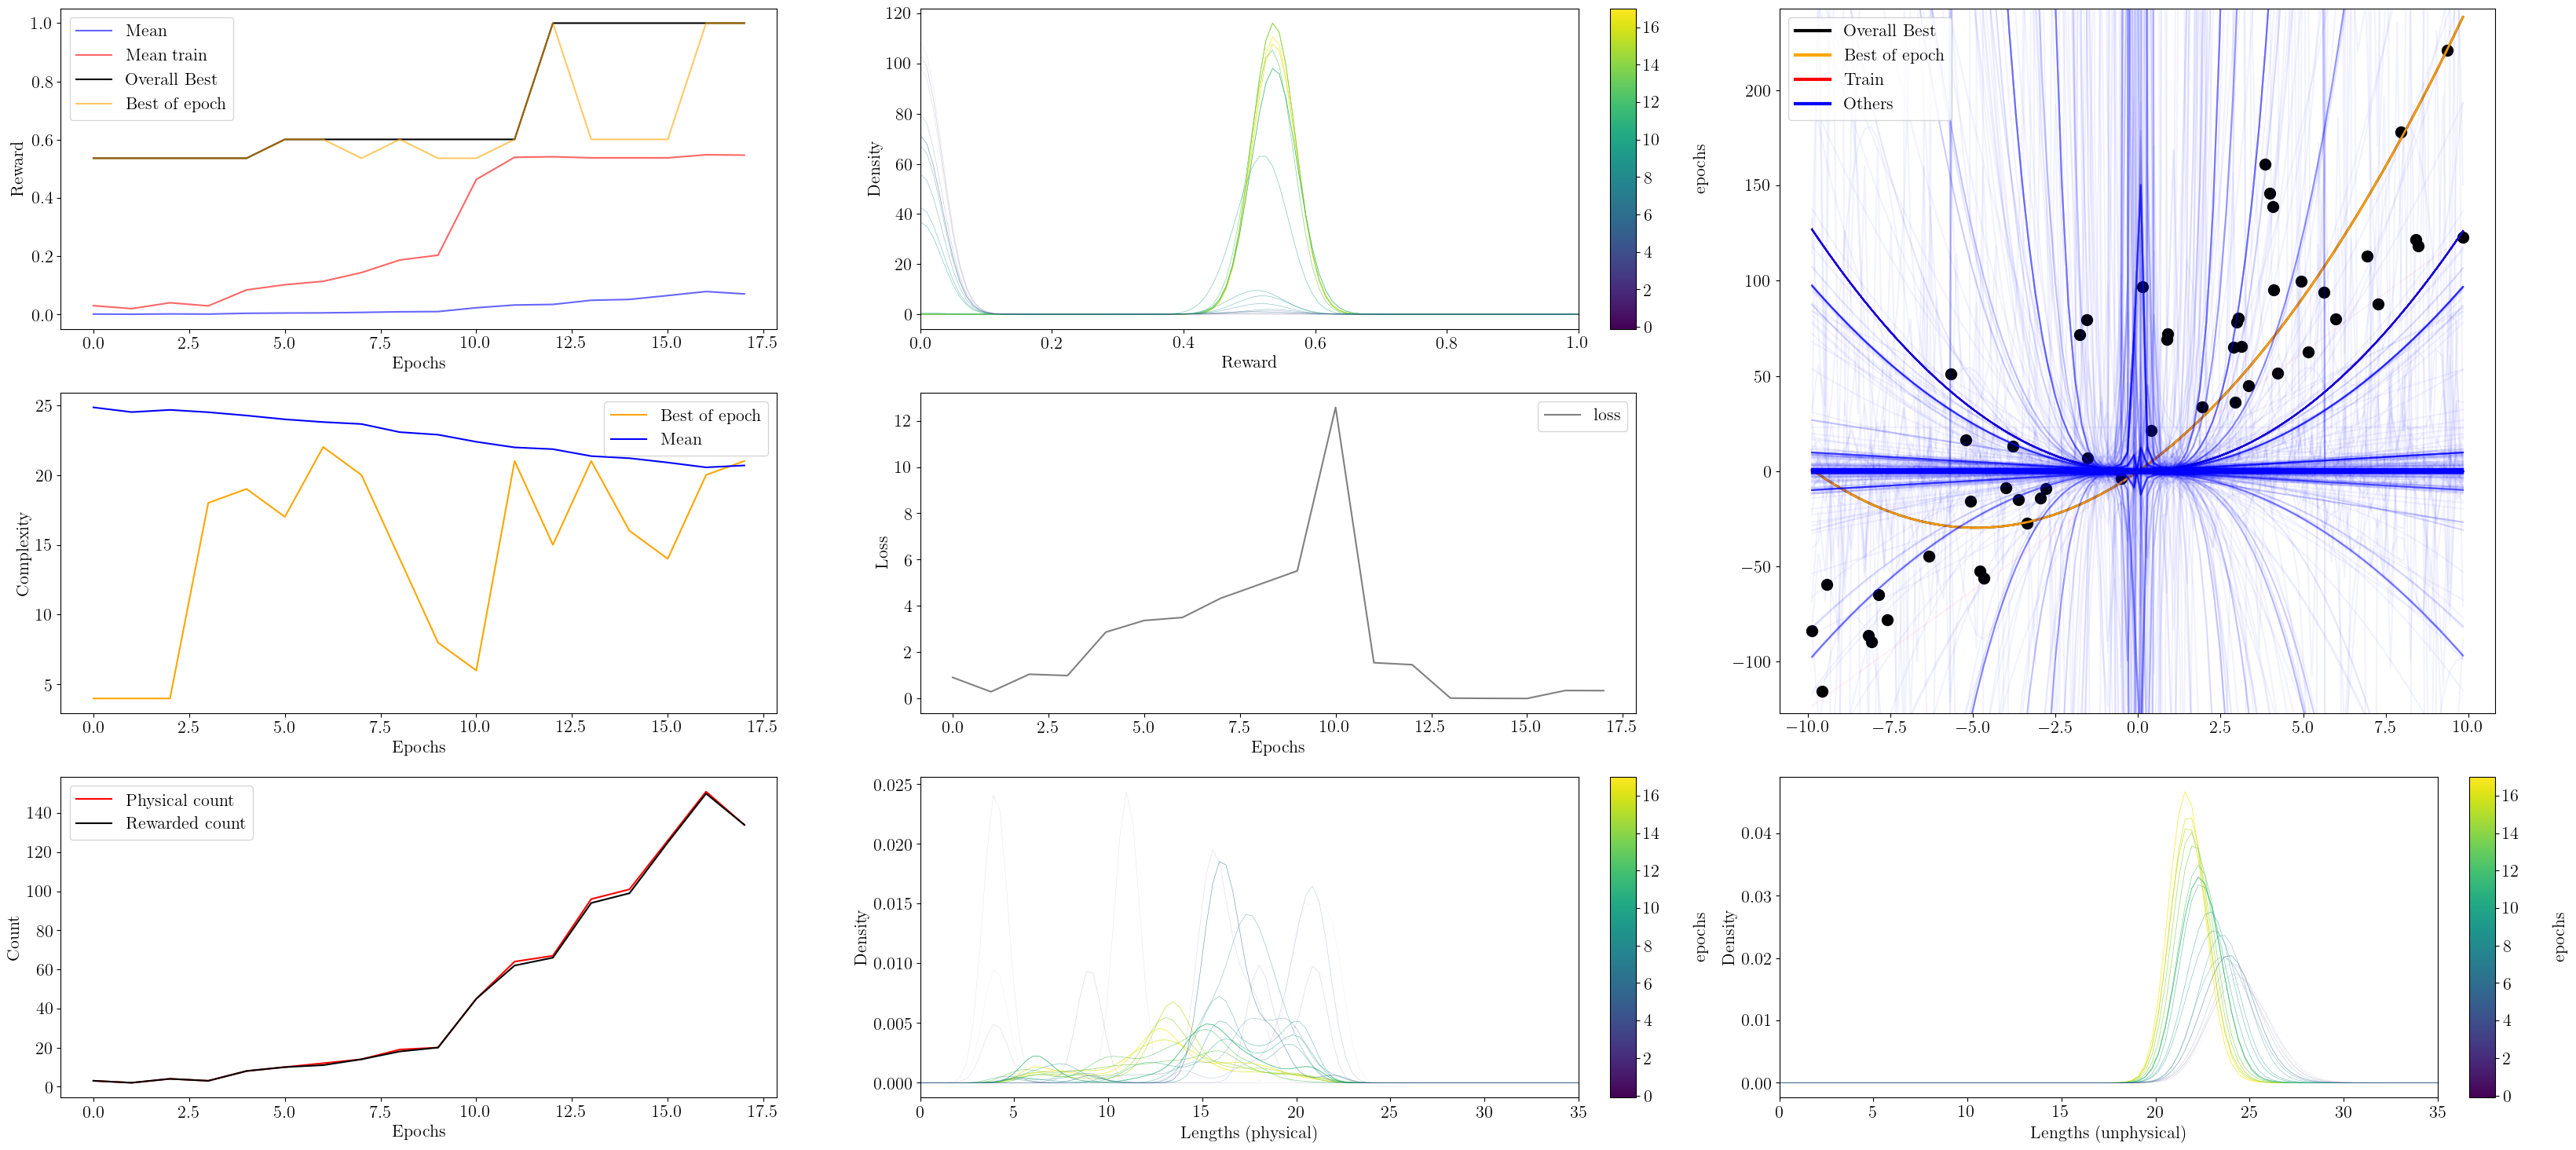

/usr/local/Cluster-Apps/ceuadmin/PhySO/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


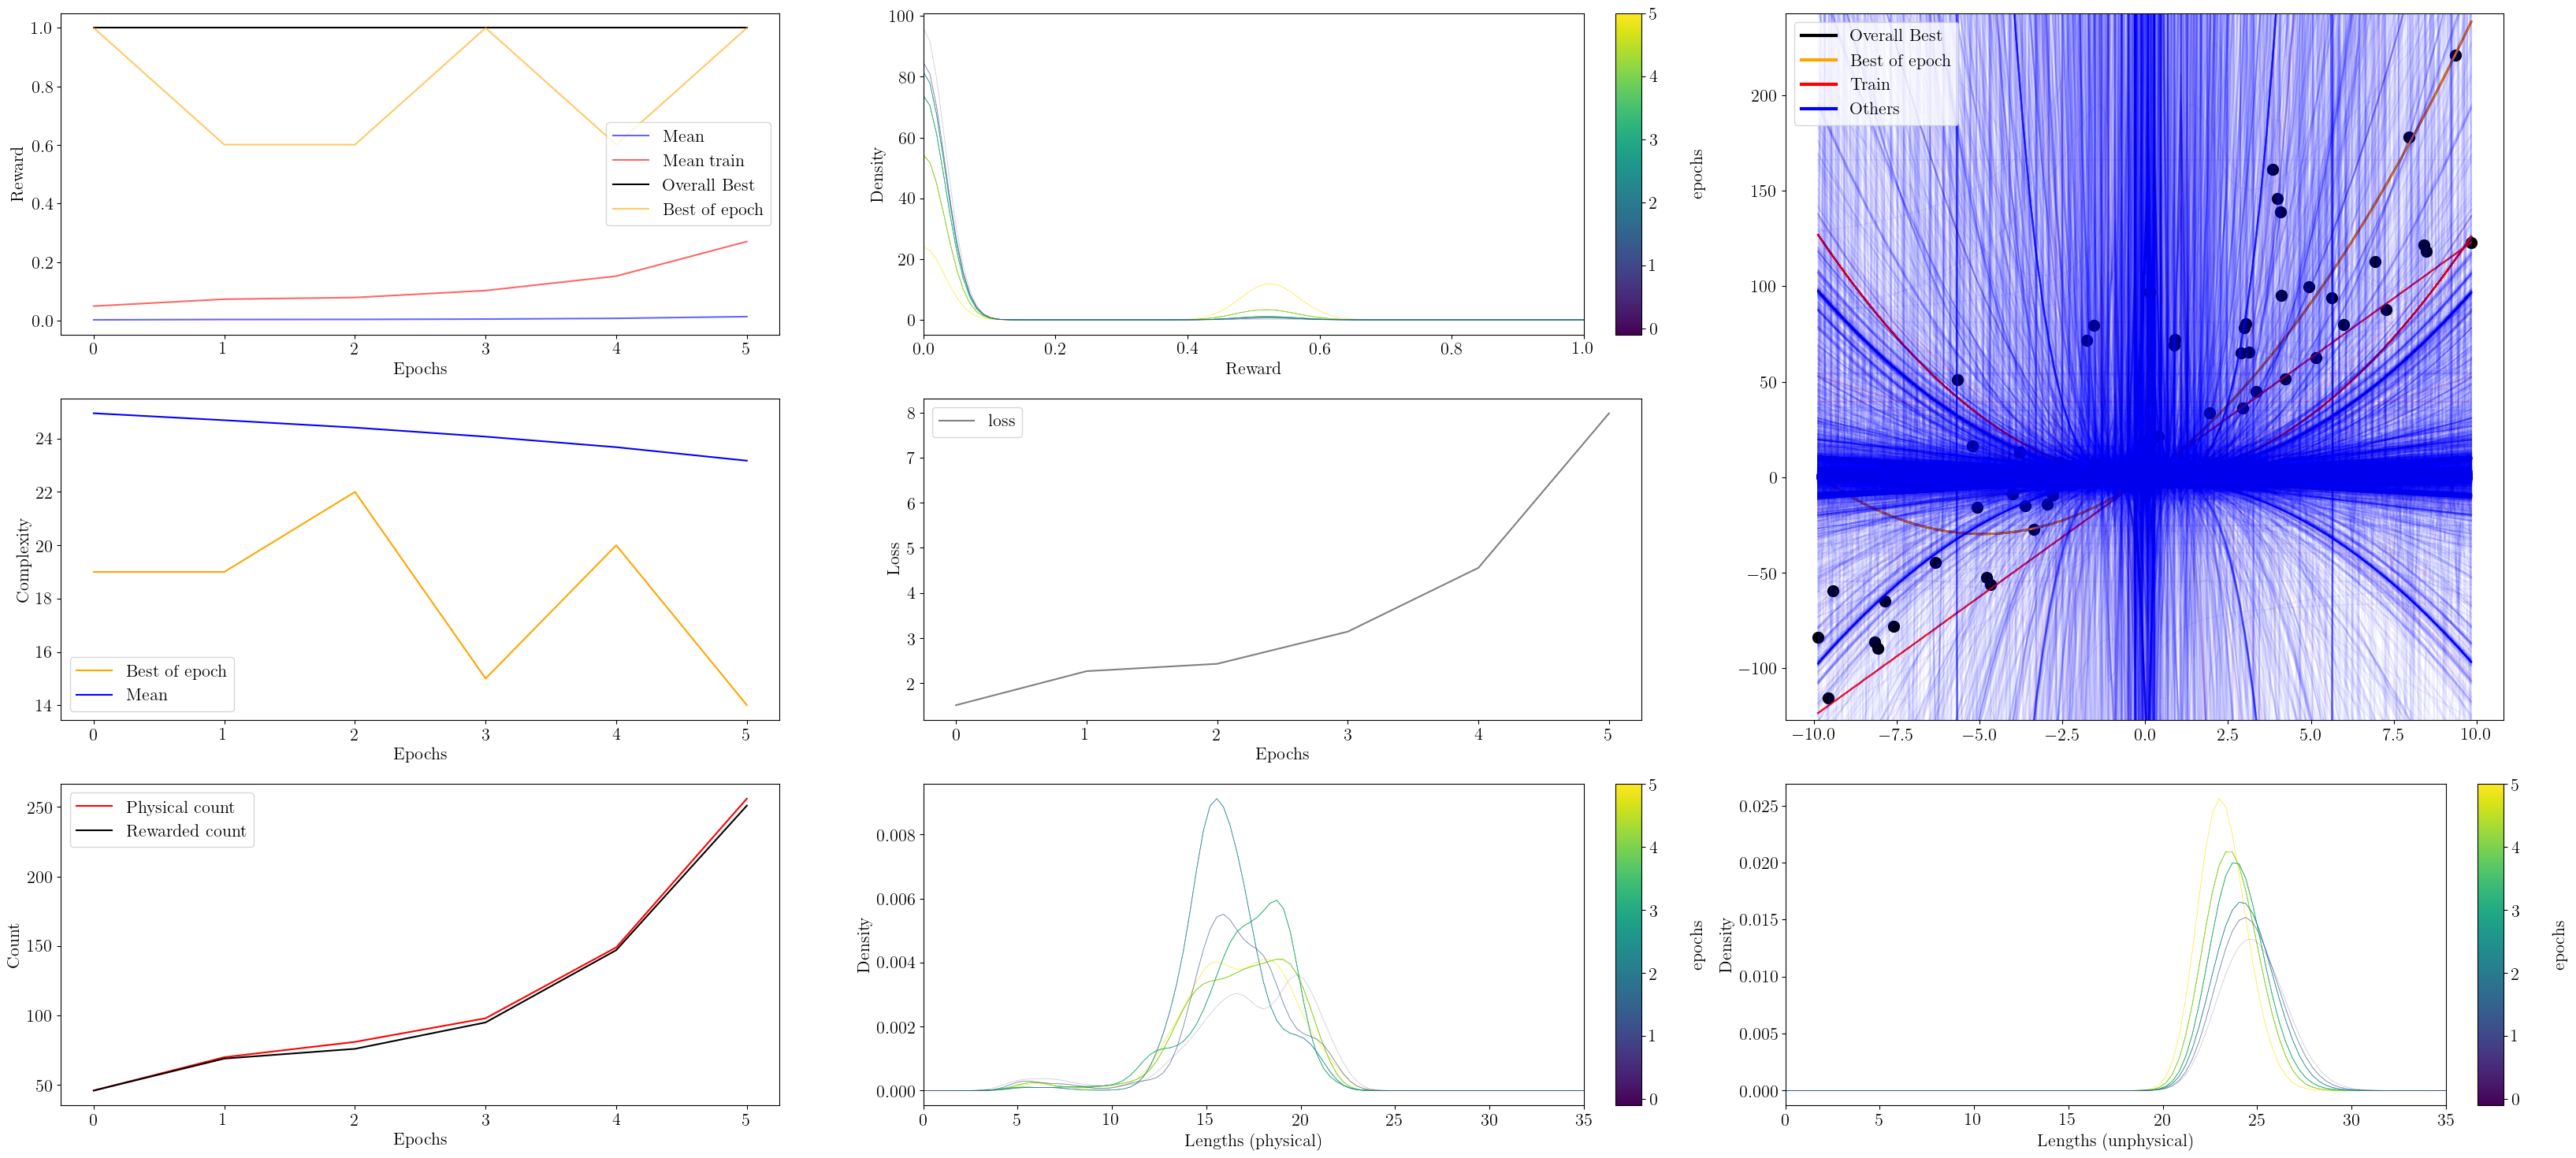

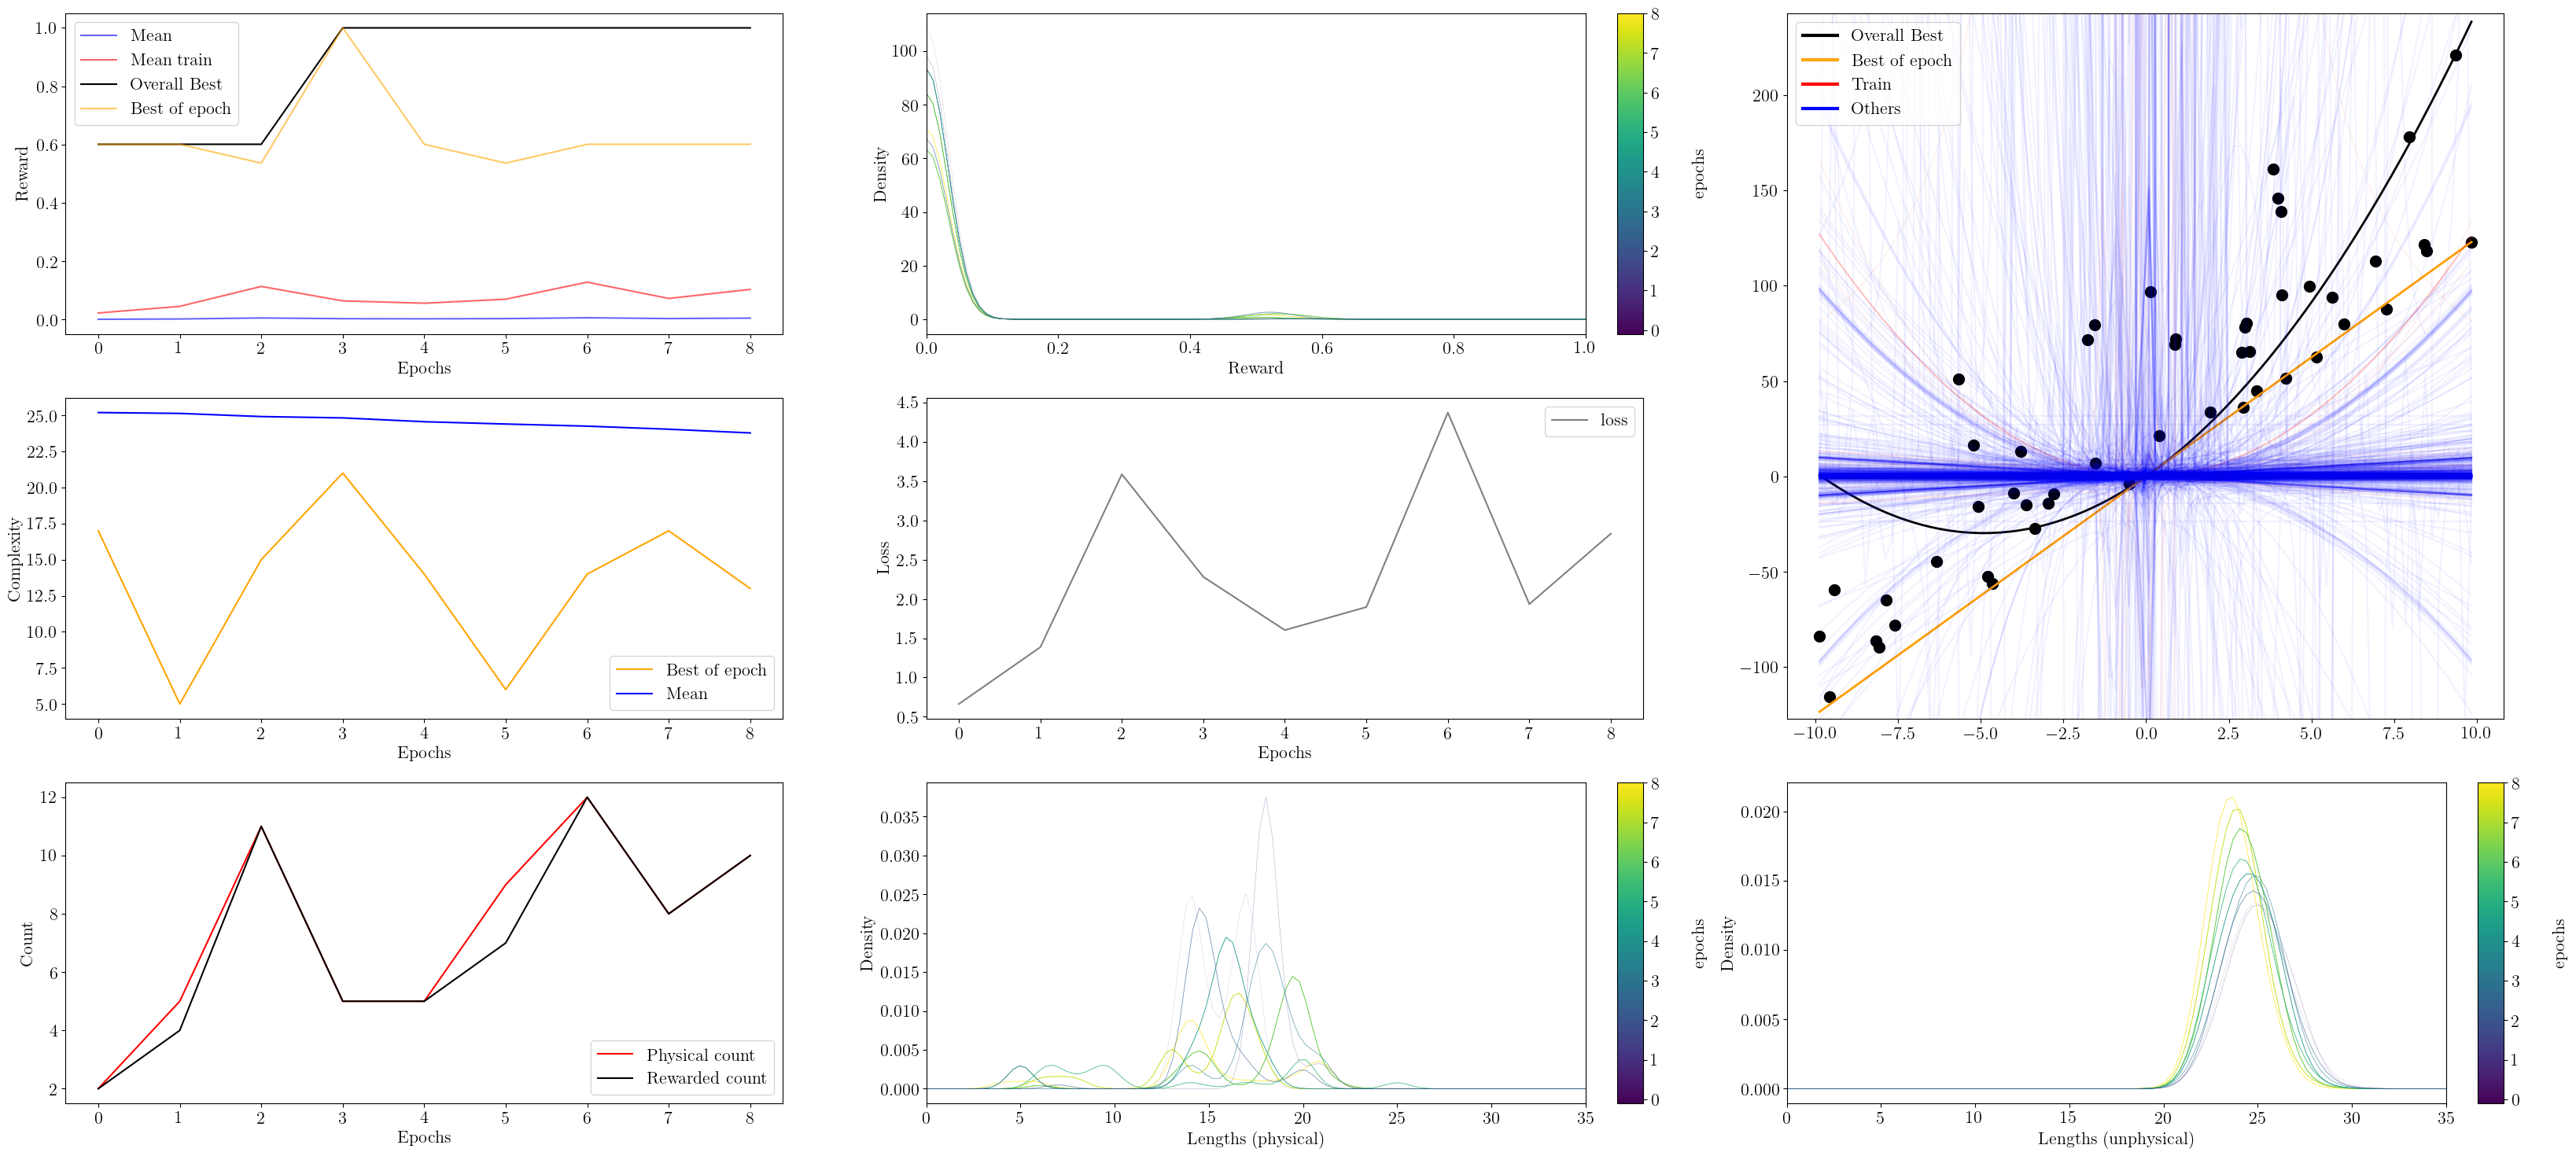

In [2]:
# set 1. Symbolic regression with default hyperparameters.
expression, logs = physo.SR(X, y,
                            X_units = [ [1, 0, 0] , [1, -1, 0] ],
                            y_units = [2, -2, 1],
                            fixed_consts       = [ 1.      ],
                            fixed_consts_units = [ [0,0,0] ],
                            free_consts_units  = [ [0, 0, 1] , [1, -2, 0] ],
)
# set 2 Hyperparameters configurations.
expression, logs = physo.SR(X, y,
                            X_units = [ [1, 0, 0] , [1, -1, 0] ],
                            y_units = [2, -2, 1],
                            fixed_consts       = [ 1.      ],
                            fixed_consts_units = [ [0,0,0] ],
                            free_consts_units  = [ [0, 0, 1] , [1, -2, 0] ],
                            run_config = physo.config.config1.config1
)
# set 3. Selectable symbolic operations.
expression, logs = physo.SR(X, y,
                            X_names = [ "z"       , "v"        ],
                            X_units = [ [1, 0, 0] , [1, -1, 0] ],
                            y_name  = "E",
                            y_units = [2, -2, 1],
                            fixed_consts       = [ 1.      ],
                            fixed_consts_units = [ [0,0,0] ],
                            free_consts_names = [ "m"       , "g"        ],
                            free_consts_units = [ [0, 0, 1] , [1, -2, 0] ],
                            op_names = ["mul", "add", "sub", "div", "inv", "n2", "sqrt", "neg", "exp", "log", "sin", "cos"]
)

3. wrapup

In [3]:
print(expression.get_infix_pretty(do_simplify=True))
print(expression.get_infix_latex(do_simplify=True))
print(expression.free_const_values.cpu().detach().numpy())

pareto_front_complexities, pareto_front_expressions, pareto_front_r, pareto_front_rmse = logs.get_pareto_front()
for i, prog in enumerate(pareto_front_expressions):
    # Showing expression
    print(prog.get_infix_pretty(do_simplify=True))
    # Showing free constant
    free_consts = prog.free_const_values.detach().cpu().numpy()
    for j in range (len(free_consts)):
        print("%s = %f"%(prog.library.free_const_names[j], free_consts[j]))
    # Showing RMSE
    print("RMSE = {:e}".format(pareto_front_rmse[i]))
    print("-------------")


                  1    
               ────────
   ⎛       2⎞  2⋅sin(1)
-m⋅⎝g⋅z + v ⎠⋅ℯ        
- m \left(g z + v^{2}\right) e^{\frac{1}{2 \sin{\left(1 \right)}}}
[ 9.80699986 -0.6811746 ]
   2
m⋅v 
g = 1.000000
m = 1.302577
RMSE = 6.691268e+01
-------------
g⋅m⋅z
g = 3.535338
m = 3.535338
RMSE = 5.139545e+01
-------------
       sin(1)
g⋅m⋅z⋅ℯ      
g = 2.321175
m = 2.321175
RMSE = 5.139545e+01
-------------
27015115293407⋅g⋅m⋅z⋅sin(1)
───────────────────────────
       25000000000000      
g = 3.707473
m = 3.707473
RMSE = 5.139545e+01
-------------
                  1    
               ────────
   ⎛       2⎞  2⋅sin(1)
-m⋅⎝g⋅z + v ⎠⋅ℯ        
g = 9.807000
m = -0.681175
RMSE = 6.087142e-07
-------------
